# türkiye big mac fiyatı ve istanbul trafik indeksinin yıllara göre ilişkisini görselleştiren bir çalışma

In [5]:
# gerekli kütüphaneler
%pip install pandas matplotlib -q


[notice] A new release of pip available: 22.2.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## veri çıkarma

### 1.1 big mac

theeconomist kaynaklı big mac indeksi dosyasından türkiye için olan verileri temiz bir dosyaya aktarma işlemi

In [ ]:
import pandas as pd


df = pd.read_csv('../big-mac-raw-index.csv')

df = df[df['iso_a3'] == 'TUR']

df = df[['date', 'local_price', 'dollar_ex', 'dollar_price']]

df.to_csv('turkey.csv', index=False)


print(df.head())

print(df.columns)

print(df.info())

print(df.describe())

print(df.shape)


           date  local_price     dollar_ex  dollar_price
86   2002-04-01    4000000.0  1.324500e+06      3.020008
118  2003-04-01    3750000.0  1.600500e+06      2.343018
156  2004-05-01    3950000.0  1.531000e+06      2.580013
196  2005-06-01          4.0  1.369000e+00      2.921841
231  2006-01-01          4.1  1.336500e+00      3.067714
Index(['date', 'local_price', 'dollar_ex', 'dollar_price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 86 to 1887
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          40 non-null     object 
 1   local_price   40 non-null     float64
 2   dollar_ex     40 non-null     float64
 3   dollar_price  40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB
None
        local_price     dollar_ex  dollar_price
count  4.000000e+01  4.000000e+01     40.000000
mean   2.925244e+05  1.114067e+05      3.326403
std    1.040737e+06  3.

### 1.2 trafik indeksi

ibb ulaşım dairesi başkanlığı kaynaklı istanbul trafik indeksi veri setinden iste sadece ortalama indeks ve tarihi çekiyoruz


In [2]:
df = pd.read_csv('traffic_index.csv')


df = df[['trafficindexdate', 'average_traffic_index']].rename(
    columns={'trafficindexdate': 'date', 'average_traffic_index': 'index'}
)


df['date'] = df['date'].str.slice(0, 10)


df.to_csv('traffic.csv', index=False)


print(df.head())

print(df.columns)

print(df.info())

print(df.describe())

print(df.shape)


         date      index
0  2015-08-06  57.858116
1  2015-08-07  23.770492
2  2015-08-11  38.601266
3  2015-08-12  29.715278
4  2015-08-13  28.557491
Index(['date', 'index'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3332 entries, 0 to 3331
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3332 non-null   object 
 1   index   3332 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.2+ KB
None
             index
count  3332.000000
mean     27.830846
std       8.252579
min       1.083916
25%      23.651568
50%      28.979524
75%      33.491313
max      59.428571
(3332, 2)


## 2. birleştirme

big mac ve trafik indeksi verilerini tarih sütununa göre birleştiriyoruz.


In [3]:
df1 = pd.read_csv('turkey.csv')
df2 = pd.read_csv('traffic.csv')

df = pd.merge(df1, df2, on='date', how='inner')


df.to_csv('merged.csv', index=False)


print(df.head())

print(df.columns)

print(df.info())

print(df.describe())

print(df.shape)


         date  local_price  dollar_ex  dollar_price      index
0  2016-01-01        10.25    3.00960      3.405768  24.180556
1  2016-07-01        10.75    3.04305      3.532640  33.276000
2  2017-01-01        10.75    3.91115      2.748552  12.766423
3  2017-07-01        10.75    3.57605      3.006110  16.565972
4  2018-01-01        10.75    3.80260      2.827013  11.794224
Index(['date', 'local_price', 'dollar_ex', 'dollar_price', 'index'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          18 non-null     object 
 1   local_price   18 non-null     float64
 2   dollar_ex     18 non-null     float64
 3   dollar_price  18 non-null     float64
 4   index         18 non-null     float64
dtypes: float64(4), object(1)
memory usage: 848.0+ bytes
None
       local_price  dollar_ex  dollar_price      index
count    18.00000

## 3. görselleştirme

birleştirilmiş verilerle bir görselleştirme oluşturarak iki verinin yıllara göre ilişkisini inceleme

plot saved to big-mac-and-traffic-index.png


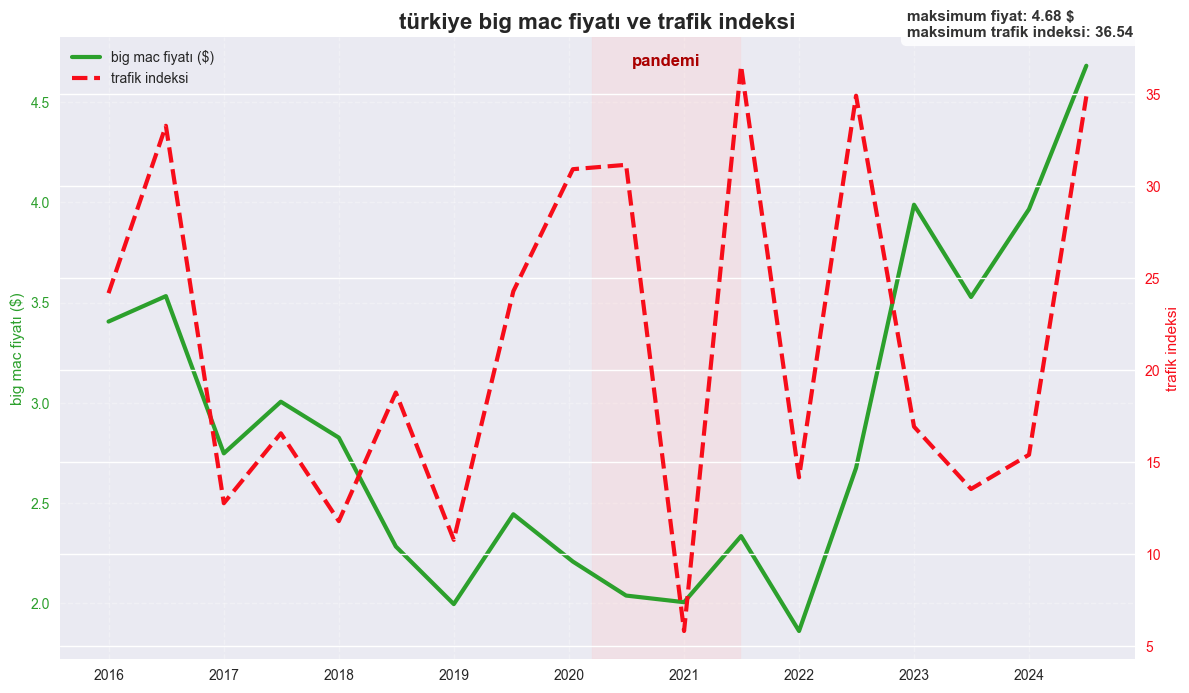

In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#stil ayarı
plt.style.use('seaborn-v0_8')


df = pd.read_csv('merged.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


fig, ax_left = plt.subplots(figsize=(12, 7))
ax_right = ax_left.twinx()

# renkler
price_color = '#2ca02c'
traffic_color = '#f70d1a'

# solda big mac fiyatı
ax_left.plot(
    df['date'],
    df['dollar_price'],
    color=price_color,
    linewidth=3,
    label='big mac fiyatı ($)'
)

# sağda trafik indeksi
ax_right.plot(
    df['date'],
    df['index'],
    color=traffic_color,
    linewidth=3,
    linestyle='--',
    label='trafik indeksi'
)

# etiketler
ax_left.set_ylabel('big mac fiyatı ($)', color=price_color, fontsize=11)
ax_right.set_ylabel('trafik indeksi', color=traffic_color, fontsize=11)

# eksen renkleri
ax_left.tick_params(axis='y', colors=price_color)
ax_right.tick_params(axis='y', colors=traffic_color)

# tarih formatı
ax_left.xaxis.set_major_locator(mdates.YearLocator())
ax_left.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# pandemi dönemini işaretle
pandemic_start = pd.Timestamp('2020-03-14')
pandemic_end = pd.Timestamp('2021-06-30') #varsayılan tarih
ax_left.axvspan(
    pandemic_start,
    pandemic_end,
    color='#ffcccb',
    alpha=0.3,
)
ax_left.text(
    pandemic_start + (pandemic_end - pandemic_start) / 2,
    0.95,
    'pandemi',
    ha='center',
    va='bottom',
    fontsize=12,
    color='#aa0000',
    fontweight='bold',
    transform=ax_left.get_xaxis_transform()
)

# maksimum değerleri bul
max_price_idx = df['dollar_price'].idxmax()
max_price_date = df.loc[max_price_idx, 'date']
max_price_value = df.loc[max_price_idx, 'dollar_price']

max_index_idx = df['index'].idxmax()
max_index_date = df.loc[max_index_idx, 'date']
max_index_value = df.loc[max_index_idx, 'index']


ax_left.grid(alpha=0.3, linestyle='--')

# maksimum değerleri göster
fig.text(
    0.76,
    0.94,
    f'maksimum fiyat: {max_price_value:.2f} $\nmaksimum trafik indeksi: {max_index_value:.2f}',
    ha='left',
    va='bottom',
    fontsize=11,
    fontweight='bold',
    color='#333333',
    bbox=dict(boxstyle='round,pad=0.4', facecolor='white', alpha=0.85, edgecolor='none')
)

# legend 
lines_left, labels_left = ax_left.get_legend_handles_labels()
lines_right, labels_right = ax_right.get_legend_handles_labels()
ax_left.legend(
    lines_left + lines_right,
    labels_left + labels_right,
    loc='upper left'
)

# başlık ve kaydetme
plt.title('türkiye big mac fiyatı ve trafik indeksi', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.savefig('big-mac-and-traffic-index.png', dpi=300)
print('plot saved to big-mac-and-traffic-index.png')

plt.show()
